# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Sam Nugraha
- **Email:** nugraha.sam@gmail.com
- **ID Dicoding:** sam210388

## Menentukan Pertanyaan Bisnis

- Berapakah Konsumen unik yang dimiliki oleh toko?
- Sebaran Konsumen per wilayah, dan wilayah mana yang memiliki konsumen paling banyak
- Mengetahui kategori produk yang terjual paling banyak, tinkat penjualan per kategori di setiap wilayah
- Bagaimanakah pertumbuhan penjualan dari waktu ke waktu? misalnya setiap bulan
- sebaran kepuasan pelanggan atas suatu produk, dan kaitannya dengan tingkat penjualannya

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
product_category_dataset_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_project_visualisasi/product_category_name_translation.csv')
product_category_dataset_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [4]:
geolocation_dataset_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_project_visualisasi/geolocation_dataset.csv')
geolocation_dataset_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
customer_dataset_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_project_visualisasi/customers_dataset.csv')
customer_dataset_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customer_dataset_df.duplicated().sum()

0

In [7]:
order_items_dataset_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_project_visualisasi/order_items_dataset.csv')
order_items_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order_items_dataset_df.duplicated().sum()

0

In [9]:
order_payments_dataset_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_project_visualisasi/order_payments_dataset.csv')
order_payments_dataset_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
order_payments_dataset_df.duplicated().sum()

0

In [11]:
order_reviews_dataset_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_project_visualisasi/order_reviews_dataset.csv')
order_reviews_dataset_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
order_reviews_dataset_df.duplicated().sum()

0

In [13]:
orders_dataset_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_project_visualisasi/orders_dataset.csv')
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
orders_dataset_df.duplicated().sum()

0

In [15]:
products_dataset_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_project_visualisasi/products_dataset.csv')
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [16]:
products_dataset_df.duplicated().sum()

0

In [17]:
sellers_dataset_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_project_visualisasi/sellers_dataset.csv')
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [18]:
sellers_dataset_df.duplicated().sum()

0

### Assessing Data

In [19]:
customer_dataset_df.info()
customer_dataset_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [20]:
order_items_dataset_df.info()
order_items_dataset_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [21]:
order_payments_dataset_df.info()
order_payments_dataset_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [22]:
order_reviews_dataset_df.info()
order_reviews_dataset_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [23]:
orders_dataset_df.info()
orders_dataset_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [24]:
products_dataset_df.info()
products_dataset_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [25]:
sellers_dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Insight Data Customer:**
- Data Customer dapat digunakan untuk menggambarkan Sebaran Kota Kota Asal Customer. Hal ini berguna untuk menentukan kota dengan penjualan terbanyak serta produk yang laku terjual pada masing2 kota jika kita gabungkan dengan data penjualan per customer
- Seluruh data teridentifikasi lengkap dengan tipe data yang sesuai

**Insight Data Order Item:**
- Data Order Item dapat menjelaskan mengenai penghasilan per penjual, produk paling banyak terjual, produk paling banyak terjual per konsumen, berapa banyak item dibeli per order, rata rata shipping cost per konsumen
- Seluruh data dan elemen data terisi lengkap, namun demikian, terdapat kesalahan tipe data pada shipping_limit_date yang teridentifikasi sebagai object (padahal data berbentuk datetime).

**Insight Data Order Payments:**
- Data Order payments dapat menunjukan tipe pembayaran yang paling banyak dilakukan oleh konsumen, dan apakah ada korelasi antara besaran pembayaran dengan jenis pembayaran dan banyaknya cicilan yang dilakukan.
- seluruh data dan elemen terisi lengkap

**Insight: Data Order Review**
- Data Order review bisa melihat rata2 score review atas order, jarak waktu antara order diterima dan review dilakukan, serta berapa lama rata2 dan maksimum waktu yang dibutuhkan untuk memberikan tanggapan
- untuk order review terdapat data yang kosong, yaitu pada data judul reviu dan isi reviu.
- terdapat kesalahan tipe data pada review creation date dan review timestamp yang seharusnya bersifat timestamp atau datetime.

**Insight Data Orders:**
- Data Orders dapat memberikan gambaran rata2 dan maksimum waktu yang diperlukan untuk pembelian, approval dan delivery ke kurir, dan waktu pengiriman ke konsumen. berapa deviasi antara estimasi dan waktu real deliveri serta jika digabungkan dengan order review bisa dikorelasikan antara lamanya waktu delivery dengan score review konsumen.
- terdapat data data yang kosong antara lain pada order_approved_at	160 data,
order_delivered_carrier_date	1783 data dan order_delivered_customer_date	2965.

**Insight Data Product:**
- Data product dapat memberikan gambaran korelasi antara produk terjual dengan nama dan deskripsi produk serta ketersediaan foto produk. korelasi antara biaya pengiriman dengan berat dan dimensi produk
- terdapat data yang kurang lengkap antara lain pada product_category_name	610 data, product_name_lenght	610 data, product_description_lenght	610 data dan product_photos_qty	610 data.

**Insight Data Sellers:**
- Data Seller dapat memberikan gambaran lokasi seller, dapat dikaitkan dengan produk, dapat dikaitkan dengan produk terjual, tanggal penjualan dan lain lain untuk memberikan gambaran bagi sellers pada masing masing lokasi.

### Cleaning Data

**Insight:**
- Seluruh data tersaji dengan baik, tidak ada yang duplikat
- Adanya data yang tidak lengkap, dapat dilihat tergantung pada subjek data, misalnya terkait order, tergantung penyelesaian proses order dan lainnya.

## Exploratory Data Analysis (EDA)

### Pertanyaan Bisnis:
a. Berdasarkan Data Tabel Customer?
- Berapa jumlah konsumen?
- berapa jumlah konsumen per wilayah dan mengetahui mana?
- wilayah yang memiliki konsumen paling banyak?


b. Berdasarkan Tabel Produk
- Produk Apa yang paling banyak terjual?
- produk apa yang paling banyak terjual oleh setiap seller?
- seller mana yang paling banyak menjual produk?
- seller mana yang paling banyak memperoleh pendapatan?

c. Berdasarkan orders dan customer dataset:
- Customer yang paling banyak melakukan pembelian?
- bulan paling banyak terjadinya pembelian?
- lamanya pemrosesan pesanan, sejak customer melakukan pembelian sampai dengan barang sampai ditangan konsumen?

d. berdasarkan order payment dataset:
- jenis pembayaran yang banyak dilakukan oleh customer
- rata rata cicilan yang dilakukan
- apakah ada korelasi antara besarnya nilai dengan banyaknya cicilan?

e. Berdasarkan order_review dataset
- korelasi antara review produk dengan penjualan

In [26]:
jumlah_customer = customer_dataset_df['customer_unique_id'].nunique()
print(f'Jumlah Customer: {jumlah_customer}')

Jumlah Customer: 96096


In [27]:
unique_customers_per_state = customer_dataset_df.groupby('customer_state')['customer_unique_id'].nunique().reset_index(name='unique_customers').sort_values(by='unique_customers', ascending=False)
print(unique_customers_per_state)

unique_customers_per_city = customer_dataset_df.groupby('customer_city')['customer_unique_id'].nunique().reset_index(name='unique_customers').sort_values(by='unique_customers', ascending=False)
print(unique_customers_per_city)

   customer_state  unique_customers
25             SP             40302
18             RJ             12384
10             MG             11259
22             RS              5277
17             PR              4882
23             SC              3534
4              BA              3277
6              DF              2075
7              ES              1964
8              GO              1952
15             PE              1609
5              CE              1313
13             PA               949
12             MT               876
9              MA               726
11             MS               694
14             PB               519
16             PI               482
19             RN               474
1              AL               401
24             SE               342
26             TO               273
20             RO               240
2              AM               143
0              AC                77
3              AP                67
21             RR           

**Insight:**
- Terdapat 96069 unique customer
- jumlah customer terbanyak berasal dari negara bagian SP dengan 40.302 customer, diikuti RJ dengan  12.384 customer, MG dengan 11.259 customer, dan RS dengan 5.277 customer.
- lima kota terbanyak terjadinya penjualan adalah sao paulo, rio de janeiro, belo horizonte, brasilia dan curtiba.

In [28]:
df_merged = order_items_dataset_df.merge(products_dataset_df[['product_id', 'product_category_name']],
                               on='product_id',
                               how='left')
df_merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim


In [29]:
produk_terbanyak = df_merged.groupby(['product_category_name'])['order_item_id'].count().reset_index(name='jumlah_terjual')
produk_terbanyak = produk_terbanyak.sort_values(by='jumlah_terjual', ascending=False).head(5)
print(produk_terbanyak)

     product_category_name  jumlah_terjual
13         cama_mesa_banho           11115
11            beleza_saude            9670
32           esporte_lazer            8641
54        moveis_decoracao            8334
44  informatica_acessorios            7827


In [43]:
pendapatan_seller = df_merged.groupby('seller_id')['price'].sum().reset_index(name='total_pendapatan')
pendapatan_seller = pendapatan_seller.sort_values(by='total_pendapatan', ascending=False).head(5)
print(pendapatan_seller)

                             seller_id  total_pendapatan
857   4869f7a5dfa277a7dca6462dcf3b52b2         229472.63
1013  53243585a1d6dc2643021fd1853d8905         222776.05
881   4a3ca9315b744ce9f8e9374361493884         200472.92
3024  fa1c13f2614d7b5c4749cbc52fecda94         194042.03
1535  7c67e1448b00f6e969d365cea6b010ab         187923.89


**Insight:**
- Product category terbanyak yang terjual adalah cama_mesa_banho dengan 11.115 produk terjual, beleza_saude dengan 9670 produk terjual, esporte_lazer dengan 8641 produk terjual, moveis_decoracao dengan 8334 produk terjual dan informatica_acessorios dengan 7827 produk terjual.

- jumlah penjualan terbanyak mencapai $229.472.  

In [31]:
df_merged_order = orders_dataset_df.merge(order_items_dataset_df[['order_id', 'product_id','price']],
                               on='order_id',
                               how='left')
df_merged_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,65266b2da20d04dbe00c5c2d3bb7859e,19.90


In [32]:
penjualan_customer = df_merged_order.groupby('customer_id')['price'].sum().reset_index(name='total_belanja')
penjualan_customer = penjualan_customer.sort_values(by='total_belanja', ascending=False).head(5)
print(penjualan_customer)

                            customer_id  total_belanja
8546   1617b1357756262bfa56ab541c47bc16        13440.0
91985  ec5b2ba62e574342386871631fafd3fc         7160.0
77522  c6e2731c5b391845f6800c97401a43a9         6735.0
95124  f48d464a0baaea338cb25f816991ab1f         6729.0
24771  3fd6777bbce08a352fddd04e4a7cc8f6         6499.0


In [33]:
total_penjualan_per_customer = df_merged_order.groupby('customer_id')['price'].sum().reset_index(name='total_penjualan')
rata_rata_total_penjualan_per_customer = total_penjualan_per_customer['total_penjualan'].mean()
print(f"Rata-rata total penjualan per customer: {rata_rata_total_penjualan_per_customer:.2f}")


Rata-rata total penjualan per customer: 136.68


In [34]:
df_merged_order['order_purchase_timestamp'] = pd.to_datetime(df_merged_order['order_purchase_timestamp'])
df_merged_order['purchase_month'] = df_merged_order['order_purchase_timestamp'].dt.to_period('M')
penjualan_per_bulan = df_merged_order.groupby('purchase_month')['order_id'].count().reset_index(name='jumlah_penjualan')
bulan_terbanyak = penjualan_per_bulan.sort_values(by='jumlah_penjualan', ascending=False).head(10)

print(bulan_terbanyak)

   purchase_month  jumlah_penjualan
13        2017-11              8758
15        2018-01              8257
17        2018-03              8240
18        2018-04              7980
19        2018-05              7945
16        2018-02              7706
22        2018-08              7308
21        2018-07              7111
20        2018-06              7085
14        2017-12              6357


In [35]:
rata_rata_penjualan = penjualan_per_bulan['jumlah_penjualan'].mean()
print(f"Rata-rata penjualan per bulan: {rata_rata_penjualan:.2f}")

Rata-rata penjualan per bulan: 4537.00


In [36]:
df_merged_order['order_delivered_carrier_date'] = pd.to_datetime(df_merged_order['order_delivered_carrier_date'])
df_merged_order['order_delivered_customer_date'] = pd.to_datetime(df_merged_order['order_delivered_customer_date'])
df_merged_order['selisih_order_to_customer'] = (df_merged_order['order_delivered_customer_date'] - df_merged_order['order_delivered_carrier_date']).dt.total_seconds() / 3600  # dalam jam
waktu_terlama = df_merged_order['selisih_order_to_customer'].max()
rata_rata_waktu = df_merged_order['selisih_order_to_customer'].mean()

print(f"Waktu Terlama: {waktu_terlama} jam")
print(f"Rata-rata Waktu: {rata_rata_waktu} jam")


Waktu Terlama: 4924.583333333333 jam
Rata-rata Waktu: 220.52012122197516 jam


In [37]:
df_merged_order['order_purchase_timestamp'] = pd.to_datetime(df_merged_order['order_purchase_timestamp'])
df_merged_order['order_delivered_customer_date'] = pd.to_datetime(df_merged_order['order_delivered_customer_date'])
df_merged_order['selisih_order_to_customer'] = (df_merged_order['order_delivered_customer_date'] - df_merged_order['order_purchase_timestamp']).dt.total_seconds() / 3600  # dalam jam
waktu_terlama = df_merged_order['selisih_order_to_customer'].max()
waktu_tercepat = df_merged_order['selisih_order_to_customer'].min()
rata_rata_waktu = df_merged_order['selisih_order_to_customer'].mean()

print(f"Waktu Terlama: {waktu_terlama} jam")
print(f"Waktu Tercepat: {waktu_tercepat} jam")
print(f"Rata-rata Waktu: {rata_rata_waktu} jam")

Waktu Terlama: 5031.086666666667 jam
Waktu Tercepat: 12.801944444444445 jam
Rata-rata Waktu: 299.3431328244421 jam


**Insight:**
- penjualan per customer terbanyak mencapai $13.440 dan rata rata penjualan per customer adalah $136.68
- transaksi penjualan terbanyak terjadi pada bulan november tahun 2017 sebanyak 8758 transaksi dengan rata rata transaksi perbulan mencapai 4537. Selama tahun 2018, penjualan relatif lebih tinggi jika dibandingkan tahun 2017.
- waktu pemrosesan transaksi terlama dari sejak terjadinya penjualan sampai dengan barang diterima konsumen mencapai 5031 jam atau mencapai 209 hari. dan waktu tercepat mencapai 12 jam. rata rata waktu proses adalah 299 jam atau mencapai 24 hari.
- rata rata pemrosesan waktu pengiriman mencapai 220 jam atau 9 hari.

In [38]:
order_payments_dataset_df.describe()


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [39]:
payment_counts = order_payments_dataset_df.groupby('payment_type')['order_id'].count().reset_index(name='jumlah_penggunaan')
payment_counts = payment_counts.sort_values(by='jumlah_penggunaan', ascending=False).head(2)
print(payment_counts)


  payment_type  jumlah_penggunaan
1  credit_card              76795
0       boleto              19784


**Insight:**
- jumlah cicilan terbanyak adalah mencapai 24 kali.
- tipe pembayaran yang paling banyak digunakan adalah credit card.
- rata rata pembayaran yang dilakukan oleh konsumen adalah $154

## Visualization & Explanatory Analysis

### Diharapkan dapat menjawab pertanyaan pertanyaan berikut:
1. Berapakah Konsumen unik yang dimiliki oleh toko?
2. Sebaran Konsumen per wilayah, dan wilayah mana yang memiliki konsumen paling banyak
3. Mengetahui kategori produk yang terjual paling banyak, tingkat penjualan per kategori di setiap wilayah
4. Bagaimanakah pertumbuhan penjualan dari waktu ke waktu?
5. sebaran kepuasan pelanggan atas suatu produk, dan kaitannya dengan tingkat penjualannya

### Pertanyaan 1 dan 2:

Jumlah Customer: 96096


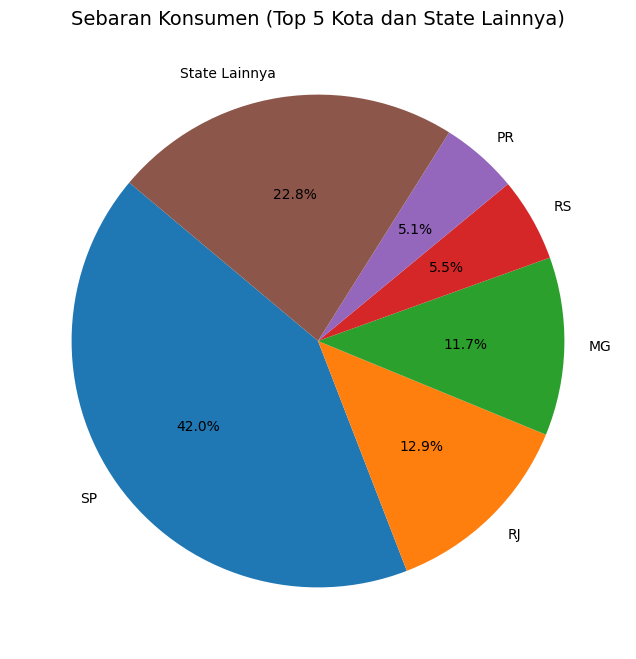

In [40]:
#mwnghitung unique customer
unique_customer = customer_dataset_df['customer_unique_id'].nunique()
print(f'Jumlah Customer: {unique_customer}')

# Menghitung sebaran konsumen per state
city_counts = customer_dataset_df['customer_state'].value_counts()

# Memilih 5 state terbanyak, dan lainnya digabung menjadi "State Lainnya"
top_5_cities = city_counts.head(5)
others = city_counts.iloc[5:].sum()
pie_data = pd.concat([top_5_cities, pd.Series({"State Lainnya": others})])

# Membuat Pie Chart
plt.figure(figsize=(8, 8))
pie_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Sebaran Konsumen (Top 5 Kota dan State Lainnya)', fontsize=14)
plt.ylabel('')  # Hapus label sumbu Y
plt.show()



### Pertanyaan 3:

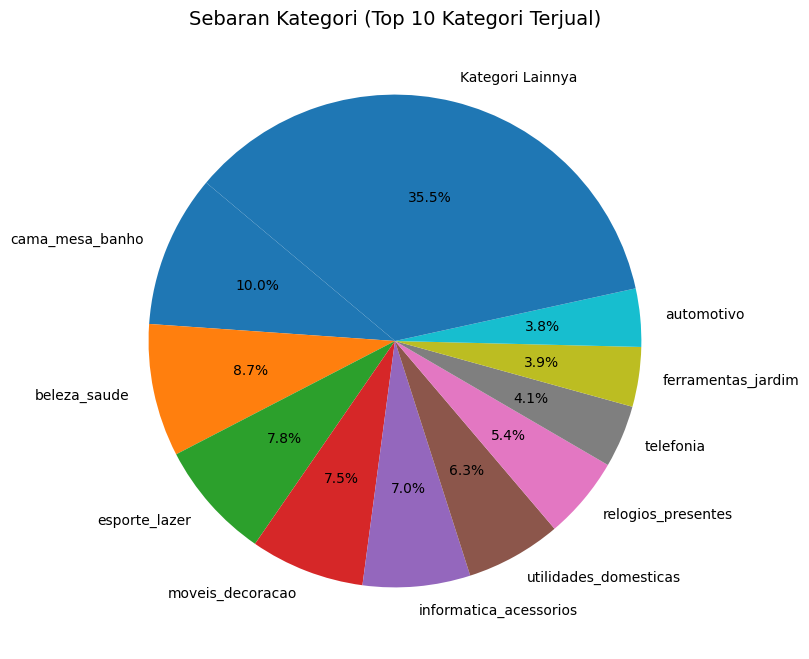

In [100]:
# Menghitung sebaran konsumen per kota
df_merged = order_items_dataset_df.merge(products_dataset_df[['product_id', 'product_category_name']],
                               on='product_id',
                               how='left')

produk_terbanyak = df_merged['product_category_name'].value_counts()

# Memilih 5 kategori terbanyak, dan lainnya digabung menjadi "Kategori Lainnya"
top_10_categories = produk_terbanyak.head(10)
others = produk_terbanyak.iloc[10:].sum()
pie_data = pd.concat([top_10_categories, pd.Series({"Kategori Lainnya": others})])

# Membuat Pie Chart
plt.figure(figsize=(8, 8))
pie_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Sebaran Kategori (Top 10 Kategori Terjual)', fontsize=14)
plt.ylabel('')  # Hapus label sumbu Y
plt.show()

### Pertanyaan 4:

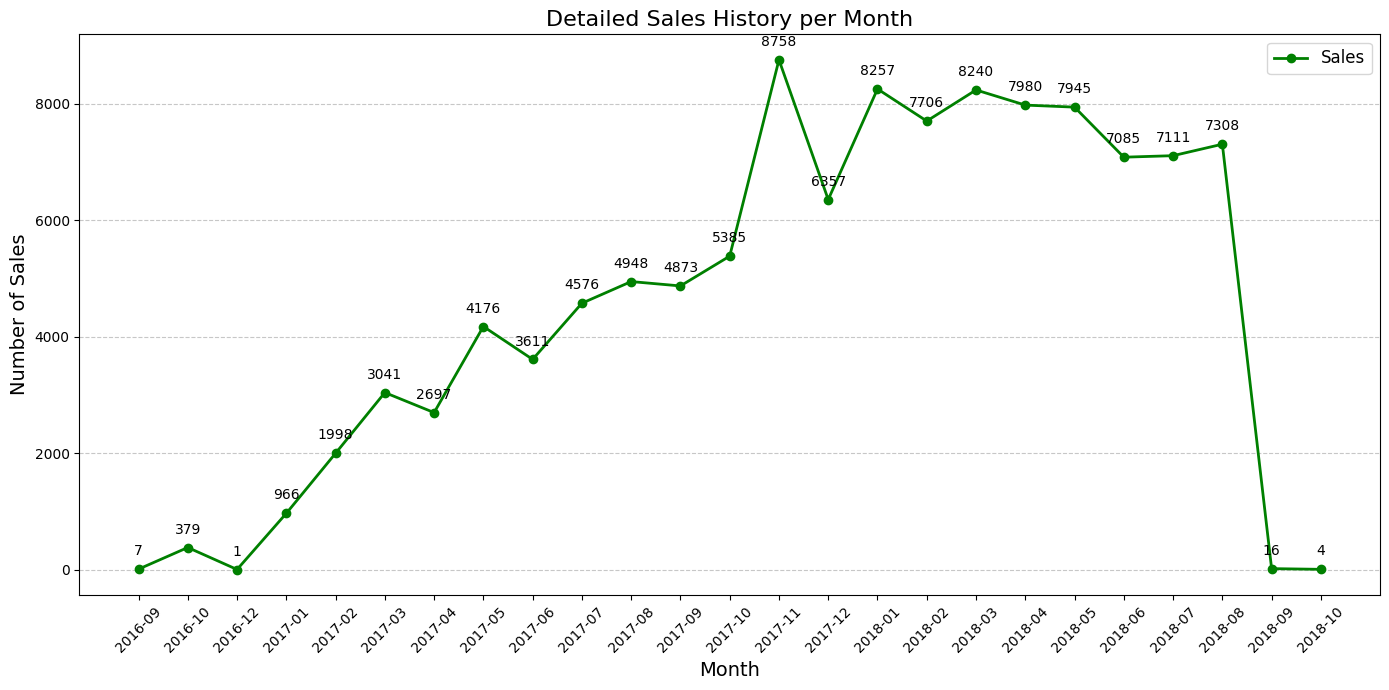

In [96]:
df_merged_order = orders_dataset_df.merge(order_items_dataset_df[['order_id', 'product_id','price']],
                               on='order_id',
                               how='left')
df_merged_order['order_purchase_timestamp'] = pd.to_datetime(df_merged_order['order_purchase_timestamp'])
df_merged_order['purchase_month'] = df_merged_order['order_purchase_timestamp'].dt.to_period('M')
penjualan_per_bulan = df_merged_order.groupby('purchase_month')['order_id'].count().reset_index(name='jumlah_penjualan')

# Generate detailed sales line chart for the sales history
plt.figure(figsize=(14, 7))

# Plot the sales data
plt.plot(
    penjualan_per_bulan['purchase_month'].astype(str),
    penjualan_per_bulan['jumlah_penjualan'],
    marker='o',
    color='green',
    linewidth=2,
    markersize=6,
    label='Sales'
)

# Add titles and labels
plt.title('Detailed Sales History per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)

# Add grid, legend, and rotation for x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(fontsize=12)

# Annotate each point with the sales value
for i, txt in enumerate(penjualan_per_bulan['jumlah_penjualan']):
    plt.annotate(txt, (penjualan_per_bulan['purchase_month'].astype(str).iloc[i], penjualan_per_bulan['jumlah_penjualan'].iloc[i]),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()


### Pertanyaan 5:

Korelasi antara jumlah penjualan dan skor review:
              total_sales  review_score
total_sales      1.000000     -0.165255
review_score    -0.165255      1.000000


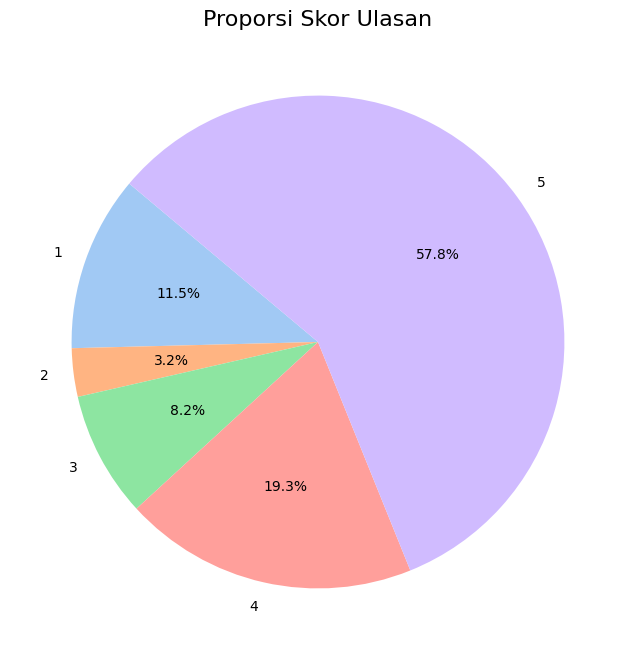

In [48]:
#menghitung total sales untuk tiap order
sales_per_order = order_items_dataset_df.groupby('order_id').size().reset_index(name='total_sales')

# menggabungkan dataframe order dan review
df_merged_order_review = order_items_dataset_df.merge(order_reviews_dataset_df[['order_id','review_id', 'review_score']],
                               on='order_id',
                               how='left')

df_merged_order_review = df_merged_order_review.merge(sales_per_order, on='order_id', how='left')

#menghitung korelasinya
correlation = df_merged_order_review[['total_sales', 'review_score']].corr()

print("Korelasi antara jumlah penjualan dan skor review:")
print(correlation)

#menggambarkan sebaran review score
order_reviews_dataset_df['review_score'] = pd.to_numeric(order_reviews_dataset_df['review_score'], errors='coerce')

# Menghitung jumlah ulasan per skor
score_counts = order_reviews_dataset_df['review_score'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
score_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proporsi Skor Ulasan', fontsize=16)
plt.ylabel('')  # Menghilangkan label y
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

1. perusahaan memiliki 96096 unique customer,
2. lokasi konsumen terbanyak berada di negara bagian SP, diikuti dengan negara bagian RJ, MG, RS, PR.
3. Kategori produk terjual terbanyak adalah cama_mesa_banho yang mencapai 10% dari total kategori, diikuti dengan beleza_saude, esporte, moveis_decoracao, dan informatica accessories serta produk2 lainnya.
4. berdasarkan historis penjualan, dapat dilihat bahwa penjualan terus bergerak naik sejak 2016 dan terbanyak terjadi pada bulan november 2017. dan setelah itu mengalami trend penurunan dan paling parah pada bulan september dan oktober 2019.
5. 77,1% pelanggan puas dengan order di perusahaan, dan 8.2% sisanya netral. Terdapat 14,7% pelanggan yang tidak puas dengan order di perusahaan dan perlu dipelajari penyebabnya

In [49]:
customer_dataset_df.to_csv('customer_dataset_df.csv', index=False)
df_merged_order.to_csv('df_merged_order.csv', index=False)
order_items_dataset_df.to_csv('order_items_dataset_df.csv', index=False)

from google.colab import files
files.download('customer_dataset_df.csv')
files.download('df_merged_order.csv')
files.download('order_items_dataset_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>